In [23]:
import numpy as np
import scipy 
import pandas as pd
from scipy import stats
import seaborn as sn
from matplotlib import pyplot as plt

In [5]:
s=pd.read_csv("Salary_Data.csv")

In [6]:
s.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
s.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Correlation

In [11]:
s.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

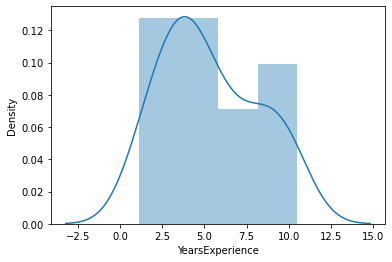

In [14]:
sn.distplot(s['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

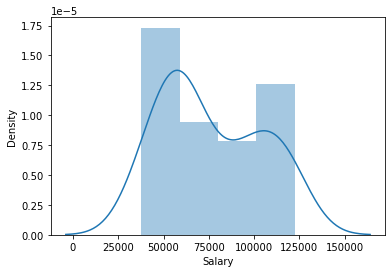

In [16]:
sn.distplot(s['Salary'])

In [17]:
s.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [18]:
s.dtypes

YearsExperience    float64
Salary             float64
dtype: object

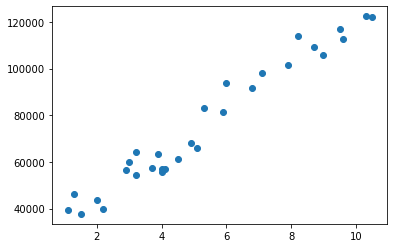

In [27]:
plt.scatter(x='YearsExperience',y='Salary', data=s)

In [28]:
s.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

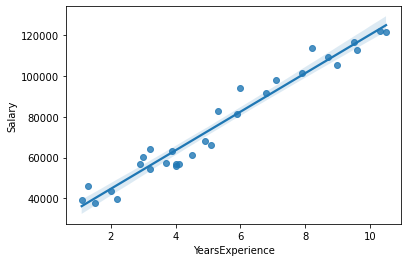

In [29]:
sn.regplot(x="YearsExperience",y="Salary",data=s)

# Model Building and Model Training

In [31]:
import statsmodels.formula.api as smf

In [54]:
model = smf.ols("Salary~YearsExperience", data = s).fit()

In [55]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [56]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

## As P value is much lesser than alpha(0.5) we can say that there is a good co-relation between variables

In [58]:
model.rsquared

0.9569566641435086

### Model Testing

In [61]:
print(9449.962321*1.1 + 25792.200199 )
print(9449.962321*1.5+25792.200199)

36187.158752100004
39967.1436805


### Machine Prediction

In [66]:
pred_data = {"YearsExperience":[1.1,2.3,3.5,7.4,11.5,12.7]}

In [67]:
pred_data

{'YearsExperience': [1.1, 2.3, 3.5, 7.4, 11.5, 12.7]}

In [69]:
test_data=pd.DataFrame(pred_data)
test_data

,YearsExperience
0,1.1
1,2.3
2,3.5
3,7.4
4,11.5
5,12.7


In [84]:
model.predict(test_data)

0     36187.158752
1     47527.113538
2     58867.068324
3     95721.921377
4    134466.766895
5    145806.721681
dtype: float64

In [77]:
test_data_a = pd.DataFrame(s,columns=['YearsExperience'])
test_data_a.head(5)

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [76]:
model.predict(test_data_a)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

## Model Deployment

In [79]:
from pickle import dump
from pickle import load

In [80]:
dump(model,open('model.pkl','wb'))

In [82]:
linear_read_model=load(open('model.pkl','rb'))

In [83]:
linear_read_model.predict(test_data)

0     36187.158752
1     47527.113538
2     58867.068324
3     95721.921377
4    134466.766895
5    145806.721681
dtype: float64